In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E:\Data Science\Assignments\PCA\PCA\wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### Histograms

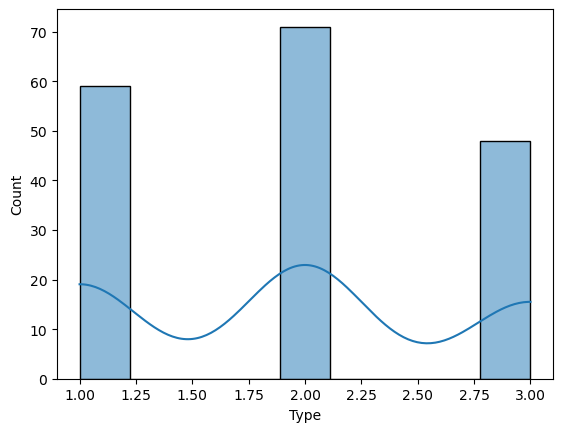

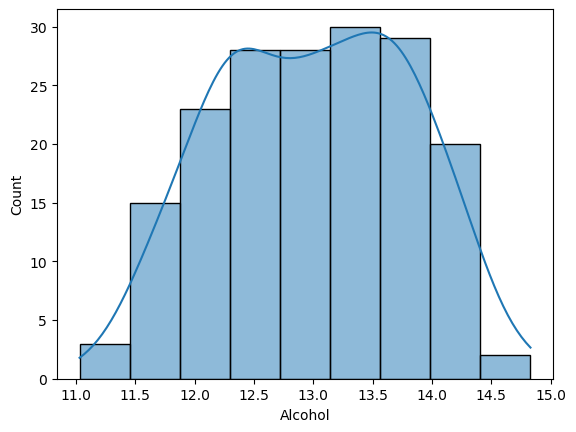

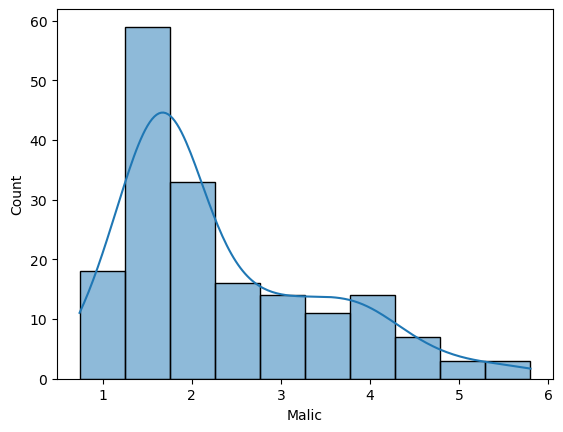

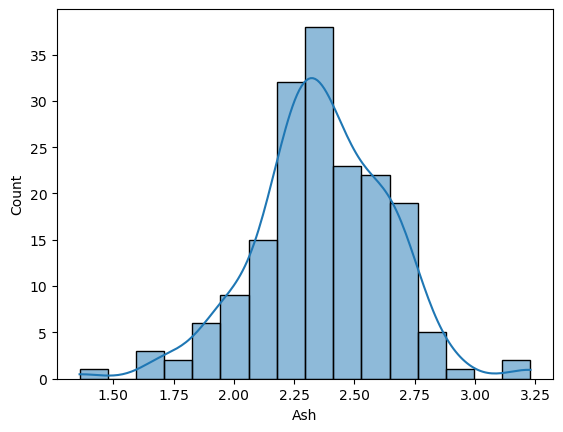

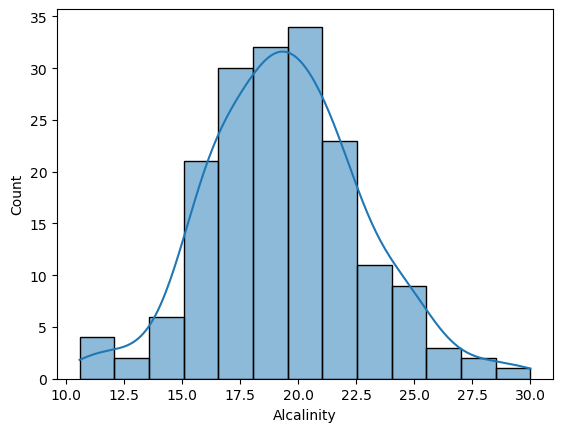

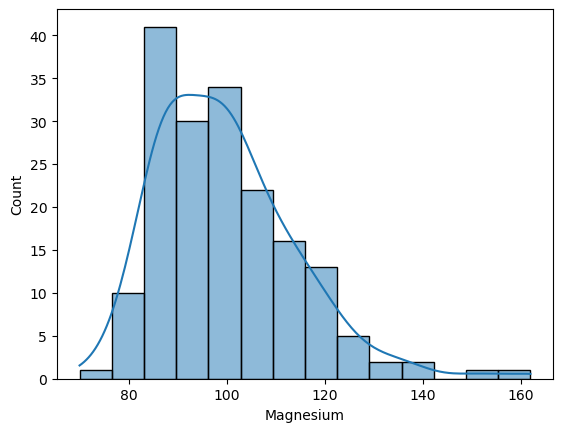

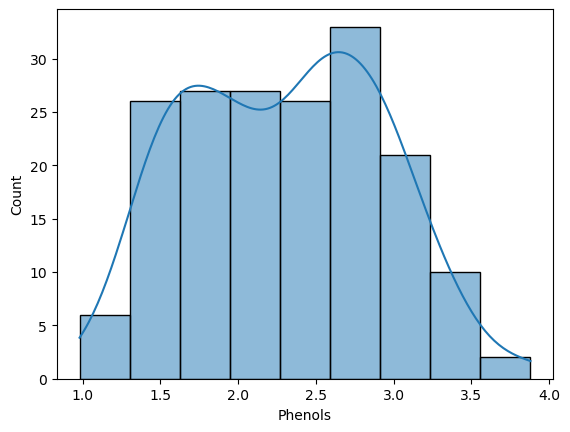

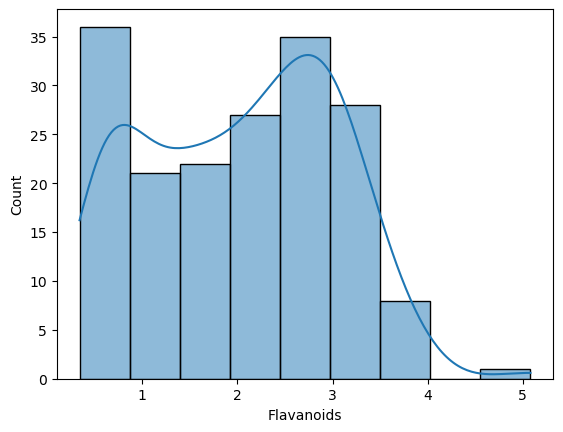

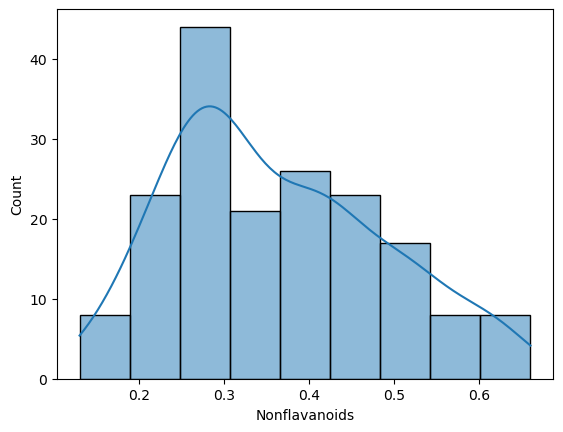

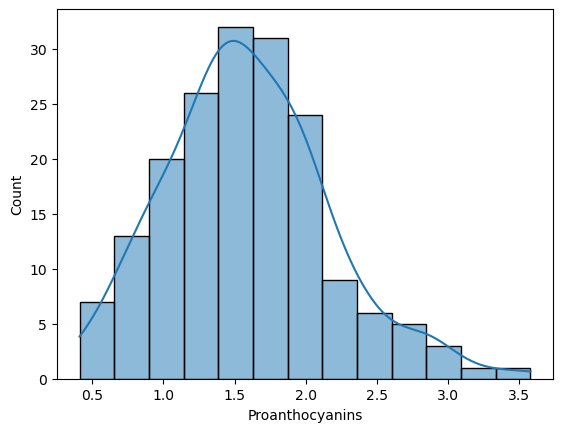

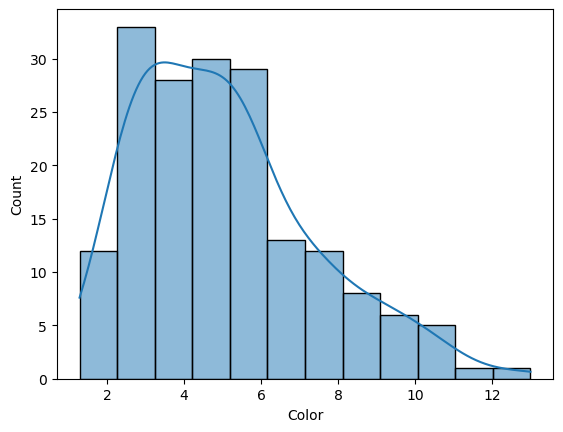

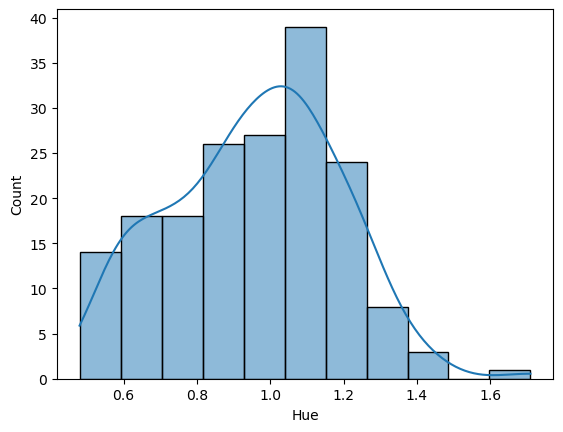

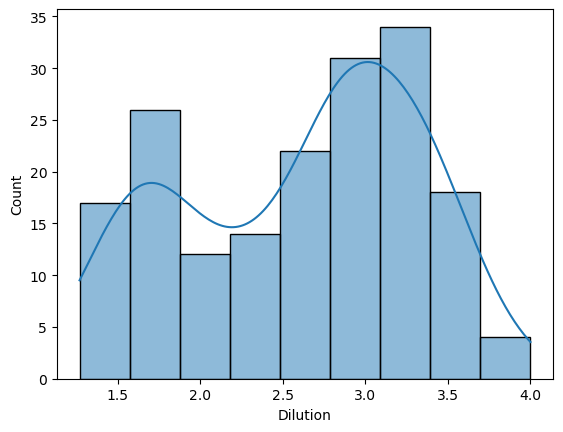

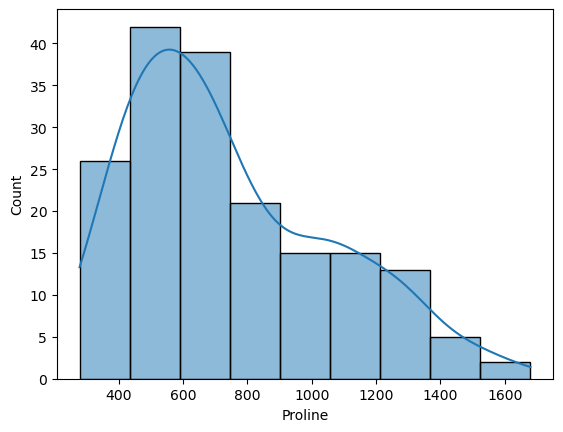

In [7]:
for column in df.columns:
    plt.figure()
    sns.histplot(df[column],kde=True)
    plt.xlabel(column)

#### Box plots

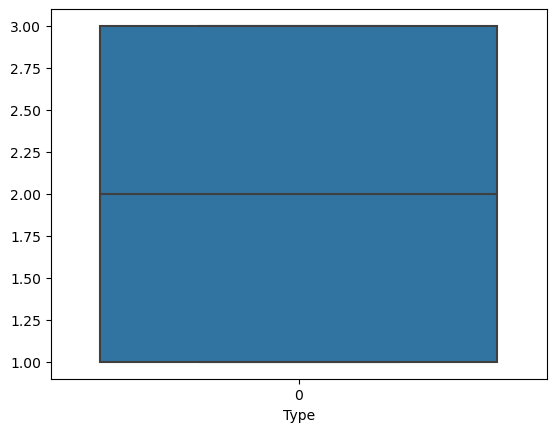

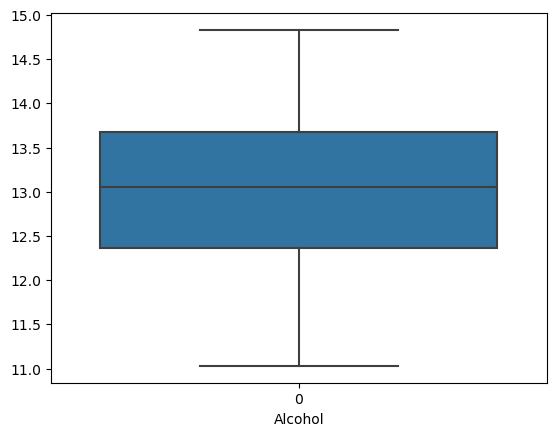

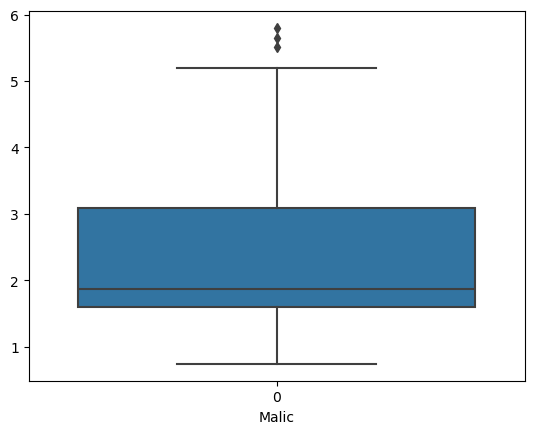

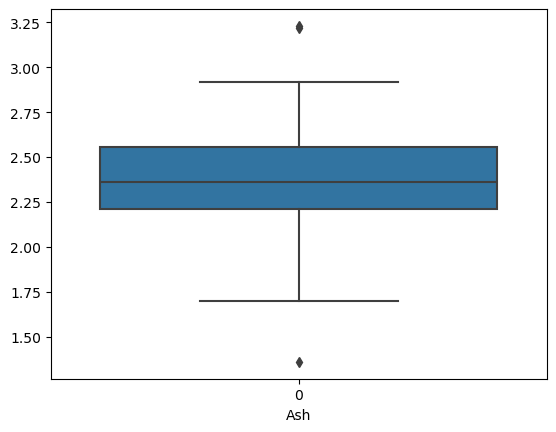

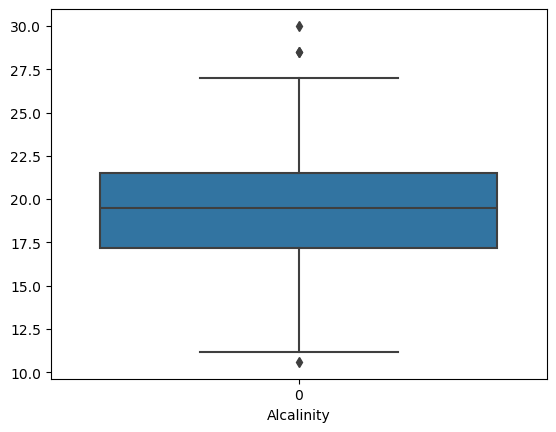

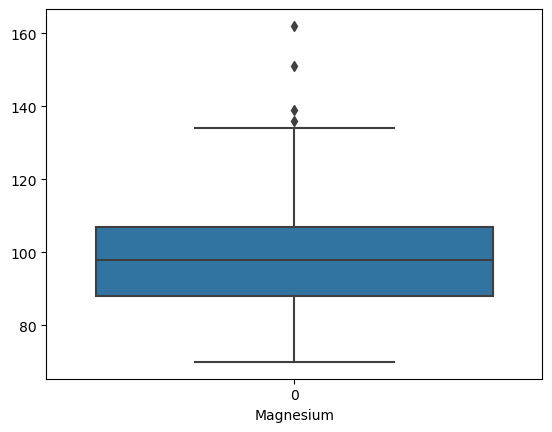

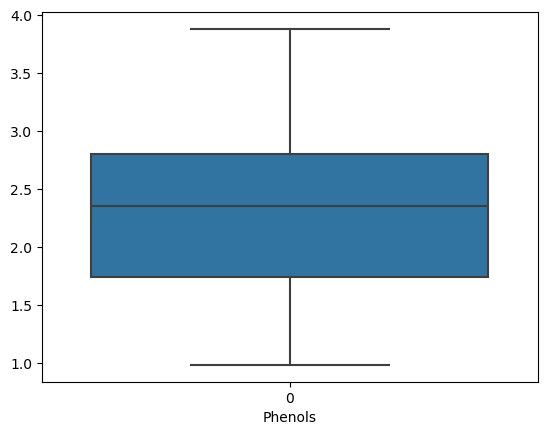

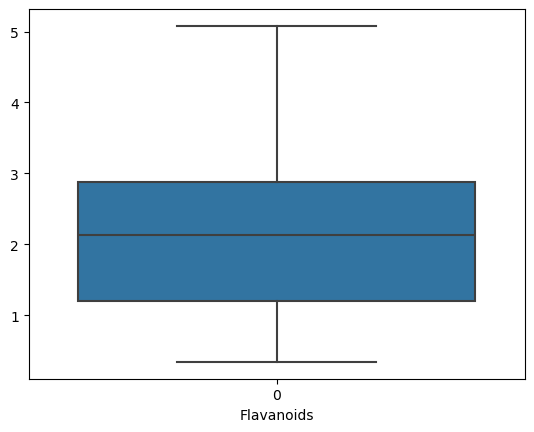

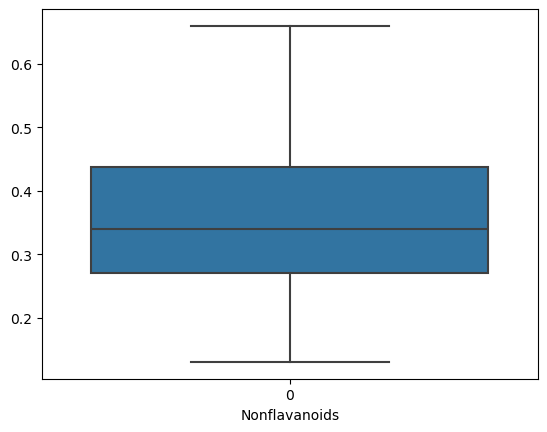

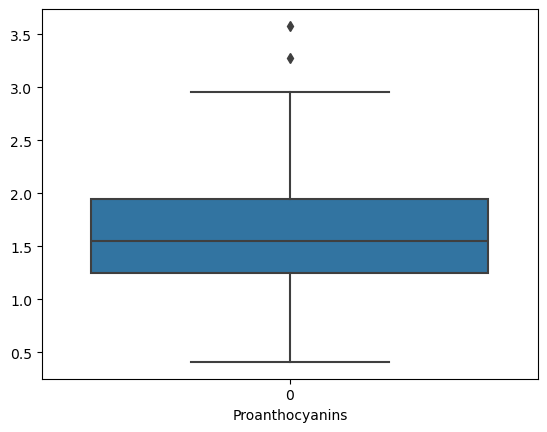

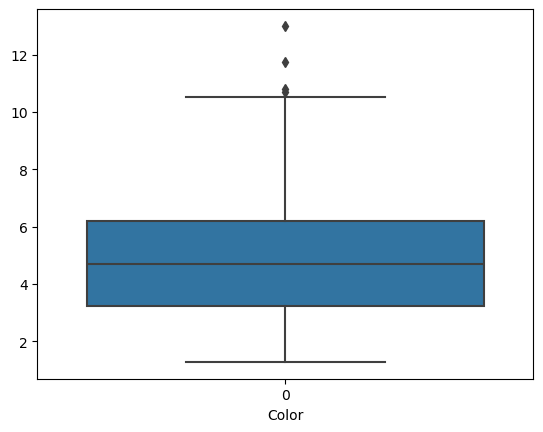

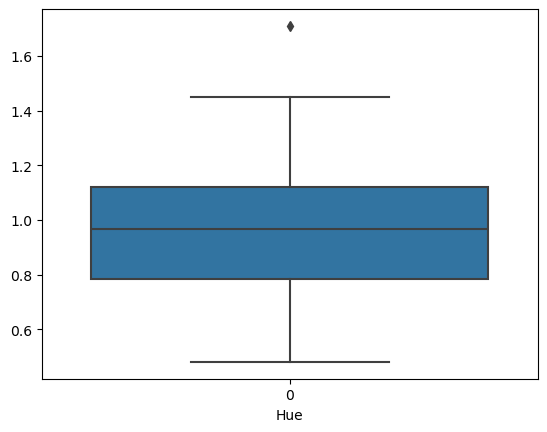

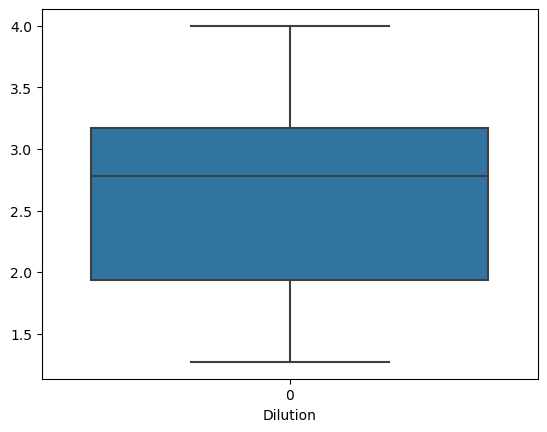

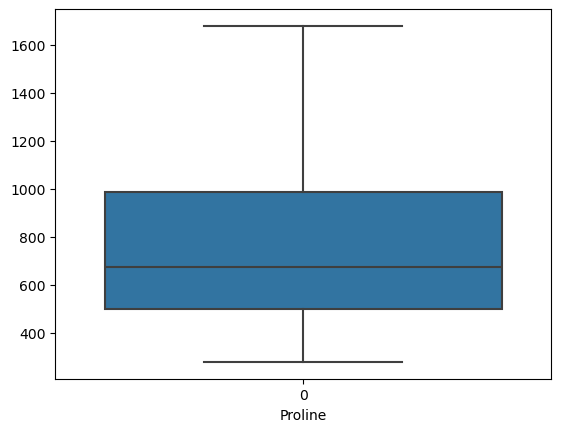

In [8]:
for column in df.columns:
    plt.figure()
    sns.boxplot(df[column],)
    plt.xlabel(column)

#### Correlations between features

In [9]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
# Data Partion
X = df.drop(columns='Type')
y = df['Type']

#### Dimensionality Reduction with PCA

In [11]:
# Standardization of the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [12]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
from sklearn.decomposition import PCA

In [14]:
# For finding the best value of n_components
pca = PCA()
pca.fit_transform(scaled_data)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [15]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

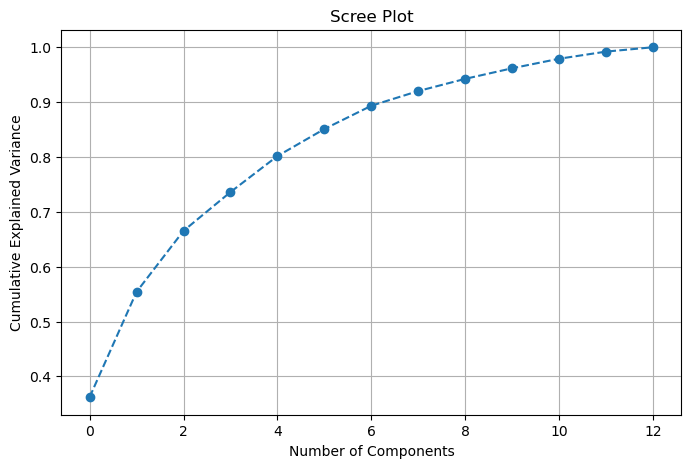

In [16]:
# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()

##### Conclusion:
- Optimal Number of Components: Based on the scree plot, the best value for n_components would be around 6.
- This selection captures a significant portion of the variance while avoiding the inclusion of components that add minimal additional information.

In [17]:
# PCA with 6 components

pca = PCA(n_components=6)
X_pca = pca.fit_transform(scaled_data)

In [18]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [19]:
# Converting into  a dataframe

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca,columns=pca_columns)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520


#### Clustering with Original Data

In [20]:
from sklearn.cluster import KMeans

In [21]:
# Finding the No.of clusters using Elbow curve
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[2314.0, 1659.0079672511501, 1277.928488844642, 1175.7051928197118, 1104.861683962532, 1042.3872037251417, 988.0533283180057, 940.7081650896529, 902.0783170433883, 866.7991687164844]


Text(0.5, 1.0, 'ELBOW CURVE')

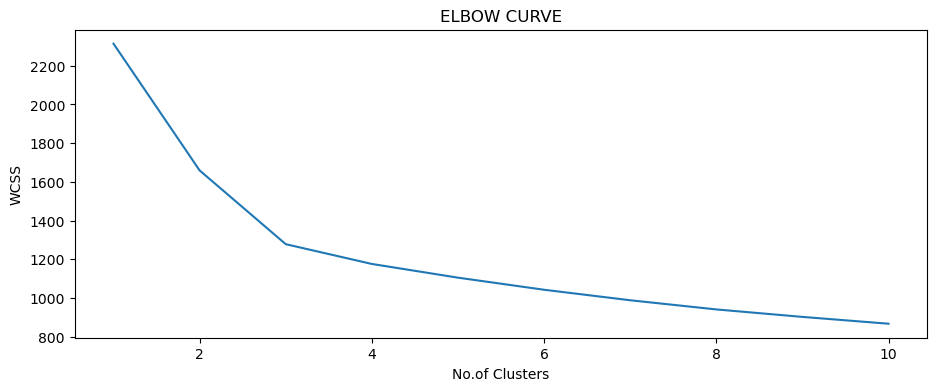

In [22]:
plt.figure(figsize=(11,4))
plt.plot(range(1,11),WCSS)
plt.xlabel("No.of Clusters")
plt.ylabel("WCSS")
plt.title("ELBOW CURVE")

Observation : According to the Elboow curve, I am going to take 3 clusters.

In [23]:
kcluster = KMeans(n_clusters=3,init='k-means++',random_state=42)
kcluster.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [24]:
kcluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data,labels=kcluster.labels_)
score.round(3)

0.285

#### Clustering with PCA Data

In [26]:
# Finding the No.of clusters using Elbow curve
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_pca)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[1969.1704059701872, 1314.8296825916575, 934.6771823439251, 835.3669035705071, 768.6970049395571, 709.6133354455803, 663.177855064242, 617.4184289677685, 585.2583138034806, 539.1825348357013]


Text(0.5, 1.0, 'ELBOW CURVE')

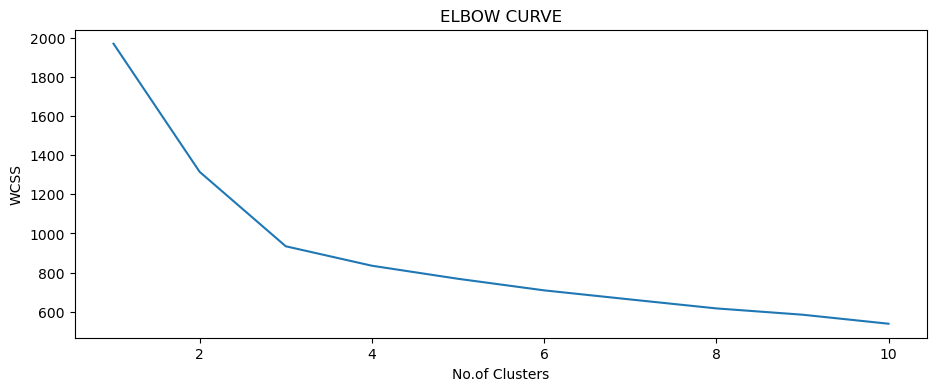

In [27]:
plt.figure(figsize=(11,4))
plt.plot(range(1,11),WCSS)
plt.xlabel("No.of Clusters")
plt.ylabel("WCSS")
plt.title("ELBOW CURVE")

Observation : According to the Elboow curve, I am going to take 3 clusters.

In [28]:
kcluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [29]:
score = silhouette_score(df_pca,labels=kcluster.labels_)
score.round(3)

0.346

#### Comparison and Analysis

- There was the increase in the model performance in the clustering results obtained from the PCA-transformed data.
- The number of clusters is same but the performance is increased.

### Conclusion and Insights
##### Recommendations for When to Use Each Technique
##### When to Use PCA:

- High-Dimensional Data: When dealing with datasets with a large number of features, PCA is useful for reducing the dimensionality to improve computational efficiency and reduce overfitting.

- Visualization: If the goal is to visualize high-dimensional data, PCA can project data into 2 or 3 dimensions, making it easier to explore and interpret.

- Preprocessing for Machine Learning: PCA is often used as a preprocessing step to reduce the number of features and improve the performance of machine learning models, particularly when dealing with high-dimensional data.

##### When to Use Clustering:

- Exploratory Data Analysis: When you want to explore and identify natural groupings or patterns within your data, clustering is useful for discovering the inherent structure of the dataset.

- Segmentation: In cases where you need to segment data into distinct groups (e.g., customer segmentation, market analysis), clustering helps in creating meaningful segments based on similarity.

- Anomaly Detection: When you need to identify unusual or rare data points that do not fit well into any cluster, clustering can be used to flag these anomalies.

- Data Reduction: When summarizing or aggregating large datasets into a smaller number of groups, clustering can help in simplifying the data and focusing analysis on representative clusters.